# Neural Network Training on Parkinsons Data

In [1]:
#in this NeuralNetwork training we will use the Parkinsons data downloaded from Kaggle to train a basic neural network/
#we will use the keras package from tensorflow
#The goal for this project is to learn the basics of modeling a neural network training
#you can change any of the hyperparmeter to train your model and make a better result out of it

In [2]:
#We will be importing packages and modules as we need them, it is ideal for teaching and explaining.
#but in practice, ideally, you would like to import everything a the beginning

# Preprocessing the data

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('parkinsons.csv')
df.head(3)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634


In [5]:
#We can drop the name the column as it's not important,
df = df.drop(columns='name')
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:
#lets check for any missing values or null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

In [7]:
#no null values, so we are good to go, may be we can do this check in another way.

df.isnull().sum()     

#df.isnull should be false for everything, which means they all should be 0, so their sum should also be 0.

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [8]:
#now we will split the data into X and y variables
X = df.drop(columns='status')
y = df['status']
X.head(3)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634


In [9]:
y.value_counts()  # let's do a quick glance at the number of unique y-variables we have

1    147
0     48
Name: status, dtype: int64

In [11]:
#now we will split the data into training and testing sets by using sklearn.model_selection.train_test_split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

In [12]:
#We need to scale our data so that the algorithm can't be biased towards a large number

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#let's take a look at the first few rows of the x_train data
x_train[:3]

array([[0.91322882, 0.32649499, 0.9577788 , 0.02279687, 0.00662252,
        0.03406467, 0.03001072, 0.03386569, 0.05970422, 0.04601479,
        0.08686441, 0.05522388, 0.03292748, 0.08698164, 0.01898559,
        0.65679103, 0.49213334, 0.20176191, 0.14625111, 0.27321659,
        0.48676321, 0.1093495 ],
       [0.52956879, 0.20000612, 0.51750086, 0.08097993, 0.07284768,
        0.08775982, 0.08145766, 0.08755051, 0.26456089, 0.2021364 ,
        0.31818182, 0.26092266, 0.16525002, 0.31820516, 0.12550813,
        0.31435422, 0.76299229, 0.59789841, 0.41712251, 0.69701881,
        0.84153988, 0.32285617],
       [0.46295801, 0.18292865, 0.49418176, 0.4763525 , 0.53642384,
        0.45900693, 0.45766345, 0.45891861, 0.65628994, 0.60476582,
        0.64503082, 0.65888738, 0.61941956, 0.644948  , 0.34483555,
        0.15922946, 0.7117441 , 0.86899472, 0.84385385, 0.91955544,
        1.        , 0.85536464]])

# Building the model

In [13]:
#now we are almost ready to build our neural network, Let's import the packages.
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [15]:
#one last preprocessing we have to do: we need to convert our y_train into a matrix with 2 classes(for 0 and 1 outputs)
print('y_train before processing')
print(y_train[:5])

y_train = keras.utils.to_categorical(y_train, num_classes=2)

#we don't need to convert the y_test, because we will comparing this against the processed predicted data
print('y_train after processing')
y_train[:5]

y_train before processing
46     0
85     1
146    1
108    1
182    1
Name: status, dtype: int64
y_train after processing


array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [16]:
#lets build and compile our model
model = Sequential()
model.add(Dense(units=50, activation='relu', input_shape=(x_train.shape[1],)))  #first hidden layer with 50 neurons
#we must provide the input shape for the first hidden layer, which should be the same as the number of attributes/
#of our X datasets.

model.add(Dense(units=100, activation='relu'))     #2nd hidden layers with 100 nerons
model.add(Dropout(0.5))                            # we will be dropping 50 percent of the neurons to preven overfitting
model.add(Dense(units=2, activation='softmax'))    #Output layer, it has two units because we have two num_classes

model.compile(optimizer='Adam', loss ='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1150      
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 202       
                                                                 
Total params: 6,452
Trainable params: 6,452
Non-trainable params: 0
_________________________________________________________________


2022-01-03 03:28:21.065061: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-03 03:28:21.065727: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [18]:
#we will now fit our model to our data
model.fit(x_train, y_train, batch_size=50, epochs=100, verbose=2, validation_split=0.2)

Epoch 1/100
3/3 - 0s - loss: 0.4599 - accuracy: 0.7963 - val_loss: 0.5407 - val_accuracy: 0.7857 - 54ms/epoch - 18ms/step
Epoch 2/100
3/3 - 0s - loss: 0.4388 - accuracy: 0.7870 - val_loss: 0.5432 - val_accuracy: 0.7857 - 34ms/epoch - 11ms/step
Epoch 3/100
3/3 - 0s - loss: 0.4167 - accuracy: 0.8148 - val_loss: 0.5475 - val_accuracy: 0.7857 - 37ms/epoch - 12ms/step
Epoch 4/100
3/3 - 0s - loss: 0.4236 - accuracy: 0.8056 - val_loss: 0.5492 - val_accuracy: 0.7857 - 33ms/epoch - 11ms/step
Epoch 5/100
3/3 - 0s - loss: 0.4247 - accuracy: 0.8148 - val_loss: 0.5463 - val_accuracy: 0.7857 - 35ms/epoch - 12ms/step
Epoch 6/100
3/3 - 0s - loss: 0.4228 - accuracy: 0.8426 - val_loss: 0.5389 - val_accuracy: 0.7857 - 35ms/epoch - 12ms/step
Epoch 7/100
3/3 - 0s - loss: 0.4495 - accuracy: 0.7963 - val_loss: 0.5260 - val_accuracy: 0.7500 - 40ms/epoch - 13ms/step
Epoch 8/100
3/3 - 0s - loss: 0.4023 - accuracy: 0.8148 - val_loss: 0.5203 - val_accuracy: 0.7500 - 37ms/epoch - 12ms/step
Epoch 9/100
3/3 - 0s - l

Epoch 68/100
3/3 - 0s - loss: 0.2702 - accuracy: 0.8796 - val_loss: 0.4297 - val_accuracy: 0.8214 - 34ms/epoch - 11ms/step
Epoch 69/100
3/3 - 0s - loss: 0.2483 - accuracy: 0.8981 - val_loss: 0.4336 - val_accuracy: 0.8214 - 32ms/epoch - 11ms/step
Epoch 70/100
3/3 - 0s - loss: 0.2626 - accuracy: 0.8889 - val_loss: 0.4351 - val_accuracy: 0.8214 - 38ms/epoch - 13ms/step
Epoch 71/100
3/3 - 0s - loss: 0.2368 - accuracy: 0.8981 - val_loss: 0.4385 - val_accuracy: 0.8214 - 34ms/epoch - 11ms/step
Epoch 72/100
3/3 - 0s - loss: 0.2401 - accuracy: 0.9074 - val_loss: 0.4389 - val_accuracy: 0.8214 - 36ms/epoch - 12ms/step
Epoch 73/100
3/3 - 0s - loss: 0.2343 - accuracy: 0.8889 - val_loss: 0.4295 - val_accuracy: 0.8214 - 33ms/epoch - 11ms/step
Epoch 74/100
3/3 - 0s - loss: 0.2597 - accuracy: 0.8981 - val_loss: 0.4010 - val_accuracy: 0.8214 - 36ms/epoch - 12ms/step
Epoch 75/100
3/3 - 0s - loss: 0.2555 - accuracy: 0.8889 - val_loss: 0.3891 - val_accuracy: 0.8214 - 32ms/epoch - 11ms/step
Epoch 76/100
3/3

In [19]:
#our validation accuracy remains flat around 0.2 after 40 epochs, although our model accuracy reached 0.93.
#we could have stoped earlier(~40 epochs) because by running it longer we are letting our model to be overfit.

In [20]:
#let's predict our result for the test_sample
prediction = model.predict(x_test)
print("prediction before processing")
print(prediction[:5])

prediction = np.argmax(prediction, axis =1) # we are converting back our prediction so that we can compare against y_test
print("prediction after processing")
print(prediction[:5])


prediction before processing
[[1.1658404e-01 8.8341600e-01]
 [2.9209710e-04 9.9970794e-01]
 [3.9650950e-01 6.0349059e-01]
 [4.0561423e-02 9.5943850e-01]
 [7.3828106e-03 9.9261719e-01]]
prediction after processing
[1 1 1 1 1]


2022-01-03 03:36:57.837732: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [21]:
#let's use some metrics to quantify our model
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test, prediction)
cm = confusion_matrix(y_test,prediction)
print(ac)
print(cm)

0.9152542372881356
[[ 7  5]
 [ 0 47]]


In [22]:
#let's plot a heatmap for our confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'Confusion Matrix')

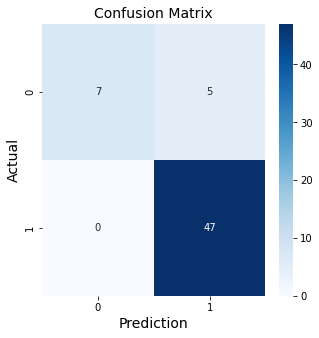

In [23]:
fig = plt.subplots(figsize=(5,5))
fig = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
fig.set_xlabel('Prediction', fontsize=14)
fig.set_ylabel('Actual', fontsize=14)
fig.set_title('Confusion Matrix', fontsize=14)

In [24]:
#if you want, you can save our model as an .h5 file, which you can use later test other samples.
import os
model.save('NNTraining_model.h5')

# #Conculsion and how to improve the model

In [ ]:
#as expected: the model didnot do a good job on predicting 0, because we had a smaller sample sets for 0.
#as a troubleshooting method, next time we should balance our data while splitting.
#we should stratify our data using StratifiedKFold or StratifiedShuffleSplit from sklearn.model_selection.